In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Define a general function to open any EEG data file given its path
def load_eeg_file(exp_folder, filename):
    """
    Load an EEG data file based on its experiment folder and filename.

    Parameters:
    ------------
    exp_folder: str or Path 
        Path to the experiment folder (e.g., "data\auditory-evoked-potential-eeg-biometric-dataset-1.0.0\Raw_Data\ex01")
    
    filename: str 
        Name of the file to load (e.g., "s01_ex01_s01.txt")
    
    Returns:
    --------
    sample_idx : np.ndarray
        Array of sample indices
    eeg : np.ndarray
        EEG signal array (num_samples x num_channels)
    """
    exp_folder = Path(exp_folder)
    file_path = exp_folder / filename

    # Load file
    try:
        df = pd.read_csv(file_path, sep=",")
    except Exception as e:
        raise ValueError(f"Could not load file {file_path}: {e}")

    # Split sample index and EEG channels
    sample_idx = df.iloc[:, 0].to_numpy()
    eeg = df.iloc[:, 1:5].to_numpy()  # 4 EEG channels

    return sample_idx, eeg
# -----------------------------------------------------------------------------------------------------------------------------------------------------
# Define a function to plot EEG signals for all or selected channels
def plot_eeg(sample_idx, eeg, channels_to_plot=None, channel_names=None):
    """
    Plot EEG signals with optional channel selection and offsets.

    Parameters:
    - sample_idx: array of sample indices
    - eeg: numpy array of shape (n_samples, n_channels)
    - channels_to_plot: list of channel indices to plot (0-based). If None, plot all.
    - channel_names: list of names for channels. If None, default to Ch1, Ch2...
    """
    n_channels = eeg.shape[1]

    if channels_to_plot is None:
        channels_to_plot = list(range(n_channels))

    if channel_names is None:
        channel_names = [f"Ch{i+1}" for i in range(n_channels)]

    plt.figure(figsize=(12, 6))
    
    for i, ch_idx in enumerate(channels_to_plot):
        plt.plot(sample_idx, eeg[:, ch_idx] + i*50, label=channel_names[ch_idx])  # offset

    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude + Offset (+ 50 uV)")
    plt.title("EEG Signals")
    plt.legend()
    plt.show()

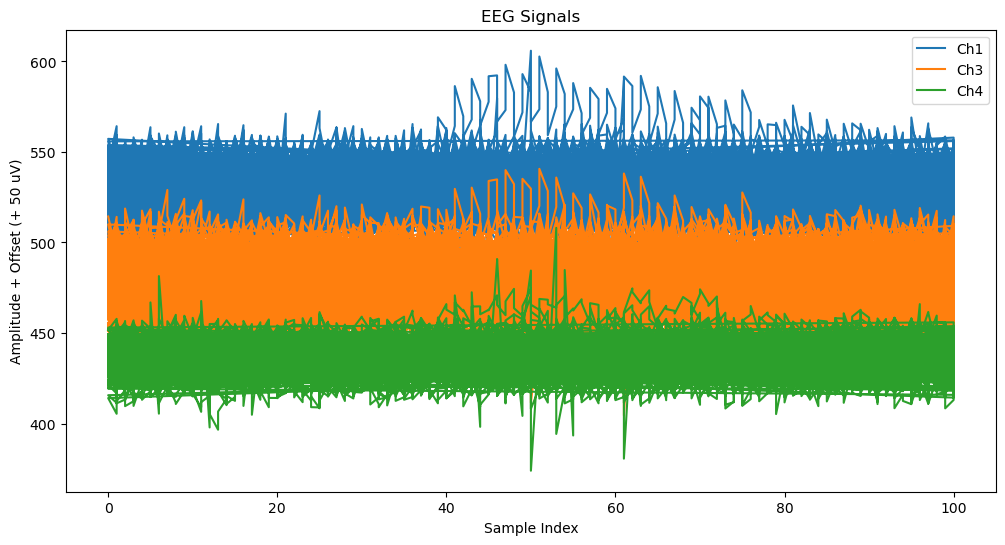

In [19]:
# Define the path to the raw data directory
raw = Path("data") / "auditory-evoked-potential-eeg-biometric-dataset-1.0.0" / "Raw_Data"

# Load any file from ex09
sample_idx, eeg = load_eeg_file(raw / "ex01", "s01_ex01_s01.txt")

# Plot all channels
plot_eeg(sample_idx, eeg, channels_to_plot=[0, 2, 3])
